# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
print(type(api_key))

<class 'str'>


In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_articles = bitcoin_news["articles"]
bitcoin_articles[:3]

[{'source': {'id': 'the-verge', 'name': 'The Verge'},
  'author': 'Richard Lawler',
  'title': 'A fake press release claiming Kroger accepts crypto reached the retailer’s own webpage',
  'description': 'A crypto hoax claimed Kroger is accepting Bitcoin Cash. The fake press release was similar to one targeting Walmart earlier this year. The retailer quickly confirmed it’s fake, but not before the cryptocurrency’s price spiked by $30.',
  'url': 'https://www.theverge.com/2021/11/5/22765098/kroger-bitcoin-cash-cryptocurrency-hoax-pump-dump',
  'urlToImage': 'https://cdn.vox-cdn.com/thumbor/CKp0YjnwF88--mWg1kfPmspvfzY=/0x358:5000x2976/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22988084/1234440443.jpg',
  'publishedAt': '2021-11-05T13:32:14Z',
  'content': 'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]'},


In [6]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q="ethereum", language="en")
ethereum_articles = ethereum_news["articles"]
ethereum_articles[:3]

[{'source': {'id': None, 'name': 'Blogspot.com'},
  'author': 'noreply@blogger.com (Unknown)',
  'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
  'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
  'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
  'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
  'publishedAt': '2021-10-16T18:50:00Z',
  'content': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and o

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_dict = {}
for counter, article in enumerate(bitcoin_articles):
    btc_dict[counter]={}

    bitcoin_analysis = analyzer.polarity_scores(article['content'])
    btc_dict[counter]['Compound'] = bitcoin_analysis["compound"]
    btc_dict[counter]['Negative'] = bitcoin_analysis["neg"]
    btc_dict[counter]['Neutral'] = bitcoin_analysis["neu"]
    btc_dict[counter]['Positive'] = bitcoin_analysis["pos"]
    btc_dict[counter]['text']= article["content"]

btc_analysis_df = pd.DataFrame.from_dict(btc_dict,orient='index')
btc_analysis_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the..."
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t..."
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_dict = {}
for counter, article in enumerate(ethereum_articles):
    eth_dict[counter]={}

    ethereum_analysis = analyzer.polarity_scores(article['content'])
    eth_dict[counter]['Compound'] = ethereum_analysis["compound"]
    eth_dict[counter]['Negative'] = ethereum_analysis["neg"]
    eth_dict[counter]['Neutral'] = ethereum_analysis["neu"]
    eth_dict[counter]['Positive'] = ethereum_analysis["pos"]
    eth_dict[counter]['text']= article["content"]

eth_analysis_df = pd.DataFrame.from_dict(eth_dict,orient='index')
eth_analysis_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,A new cross-chain bridge is currently connecte...
1,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t..."
2,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...
3,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...
4,0.4588,0.0,0.903,0.097,Cryptocurrency and business continuity line im...


In [9]:
# Describe the Bitcoin Sentiment
btc_analysis_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.195520,0.003150,0.946600,0.050250
std,0.289429,0.014087,0.066127,0.067138
min,-0.273200,0.000000,0.801000,0.000000
25%,0.000000,0.000000,0.896500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.476700,0.000000,1.000000,0.103500
max,0.755800,0.063000,1.000000,0.199000


In [10]:
# Describe the Ethereum Sentiment
eth_analysis_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.0,20.000000,20.000000
mean,0.280475,0.0,0.936850,0.063150
std,0.308037,0.0,0.074661,0.074661
min,0.000000,0.0,0.779000,0.000000
25%,0.000000,0.0,0.902500,0.000000
50%,0.180600,0.0,0.964000,0.036000
75%,0.530600,0.0,1.000000,0.097500
max,0.822500,0.0,1.000000,0.221000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_expanded = {''}

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    regex = re.compile("[^a-zA-Z ]")
    # Remove punctuation
    text_clean = [regex.sub('', text)]
    # Tokenize words
    word_tokenized = [word_tokenize(i) for i in text_clean]
    # Convert the words to lowercase and remove stop words
    lower_tokenized = [word.lower() for words in word_tokenized for word in words if word.lower() not in sw.union(sw_expanded)]
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in lower_tokenized]
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = [tokenizer(article) for article in btc_analysis_df['text']]
btc_analysis_df['tokens'] = bitcoin_tokens
btc_analysis_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.2732,0.063,0.937,0.000,A similar hoax earlier this year tied Walmart ...,"[similar, hoax, earlier, year, tied, walmart, ..."
1,0.3612,0.000,0.904,0.096,Theres a big new presence slurping up power fr...,"[there, big, new, presence, slurping, power, u..."
2,0.0000,0.000,1.000,0.000,"For all the talk of democratizing finance, the...","[talk, democratizing, finance, vast, majority,..."
3,0.5719,0.000,0.847,0.153,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
4,0.0000,0.000,1.000,0.000,Representation of cryptocurrency Bitcoin is pl...,"[representation, cryptocurrency, bitcoin, plac..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_tokens = [tokenizer(article) for article in eth_analysis_df['text']]
eth_analysis_df["tokens"] = ethereum_tokens
eth_analysis_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,A new cross-chain bridge is currently connecte...,"[new, crosschain, bridge, currently, connected..."
1,0.5719,0.0,0.847,0.153,"In keeping with a previous announcement, AMC t...","[keeping, previous, announcement, amc, theater..."
2,0.4588,0.0,0.906,0.094,Ethereum and bitcoin are the two biggest crypt...,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,0.5267,0.0,0.907,0.093,Elon Musk\r\npicture alliance / Getty Images\r...,"[elon, muskpicture, alliance, getty, imagesa, ..."
4,0.4588,0.0,0.903,0.097,Cryptocurrency and business continuity line im...,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = []
for word in bitcoin_tokens:
    bitcoin_words.extend(word)
bitcoin_ngrams = Counter(ngrams(bitcoin_words, n=2))
dict(bitcoin_ngrams.most_common(20))

{('reuters', 'bitcoin'): 6,
 ('illustration', 'taken'): 5,
 ('char', 'representation'): 4,
 ('cryptocurrency', 'bitcoin'): 4,
 ('oct', 'reuters'): 4,
 ('representation', 'virtual'): 4,
 ('bitcoin', 'seen'): 4,
 ('picture', 'illustration'): 4,
 ('char', 'bitcoin'): 4,
 ('virtual', 'cryptocurrency'): 3,
 ('seen', 'picture'): 3,
 ('taken', 'october'): 3,
 ('october', 'reutersedgar'): 3,
 ('exchangetraded', 'fund'): 3,
 ('kong', 'oct'): 2,
 ('bitcoin', 'fell'): 2,
 ('bitcoin', 'futuresbased'): 2,
 ('bitcoin', 'hit'): 2,
 ('hit', 'sixmonth'): 2,
 ('sixmonth', 'high'): 2}

In [18]:
# Generate the Ethereum N-grams where N=2
ethereum_words = []
for word in ethereum_tokens:
    ethereum_words.extend(word)
ethereum_ngrams = Counter(ngrams(ethereum_words, n=2))
dict(ethereum_ngrams.most_common(20))

{('representation', 'cryptocurrencies'): 4,
 ('illustration', 'taken'): 4,
 ('taken', 'june'): 4,
 ('new', 'york'): 3,
 ('bitcoin', 'ethereum'): 3,
 ('ethereum', 'dogecoin'): 3,
 ('crosschain', 'bridge'): 2,
 ('ethereum', 'bitcoin'): 2,
 ('york', 'time'): 2,
 ('char', 'representation'): 2,
 ('cryptocurrencies', 'bitcoin'): 2,
 ('dogecoin', 'ripple'): 2,
 ('ripple', 'litecoin'): 2,
 ('litecoin', 'placed'): 2,
 ('placed', 'pc'): 2,
 ('pc', 'motherboard'): 2,
 ('motherboard', 'illustration'): 2,
 ('june', 'reutersdado'): 2,
 ('rahul', 'rai'): 2,
 ('york', 'nov'): 2}

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_words = token_count(bitcoin_words, N=10)
bitcoin_top_words

[('bitcoin', 25),
 ('char', 19),
 ('reuters', 7),
 ('illustration', 6),
 ('taken', 6),
 ('etf', 6),
 ('new', 5),
 ('u', 5),
 ('representation', 5),
 ('cryptocurrency', 5)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
ethereum_top_words = token_count(ethereum_words, N=10)
ethereum_top_words

[('char', 20),
 ('ethereum', 12),
 ('bitcoin', 9),
 ('cryptocurrency', 8),
 ('representation', 6),
 ('cryptocurrencies', 5),
 ('new', 4),
 ('york', 4),
 ('illustration', 4),
 ('taken', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

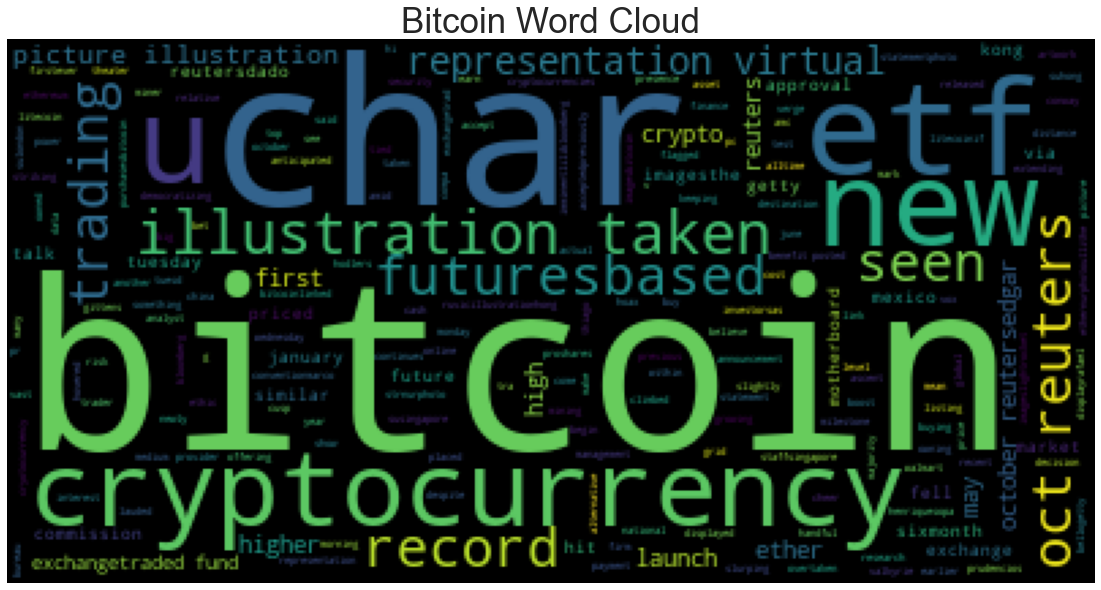

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud()
bitcoin_string = ' '.join(bitcoin_words)
bitcoin_wordcloud = wc.generate(bitcoin_string)
plt.imshow(bitcoin_wordcloud);
plt.title(label="Bitcoin Word Cloud", size=35)
plt.axis("off");

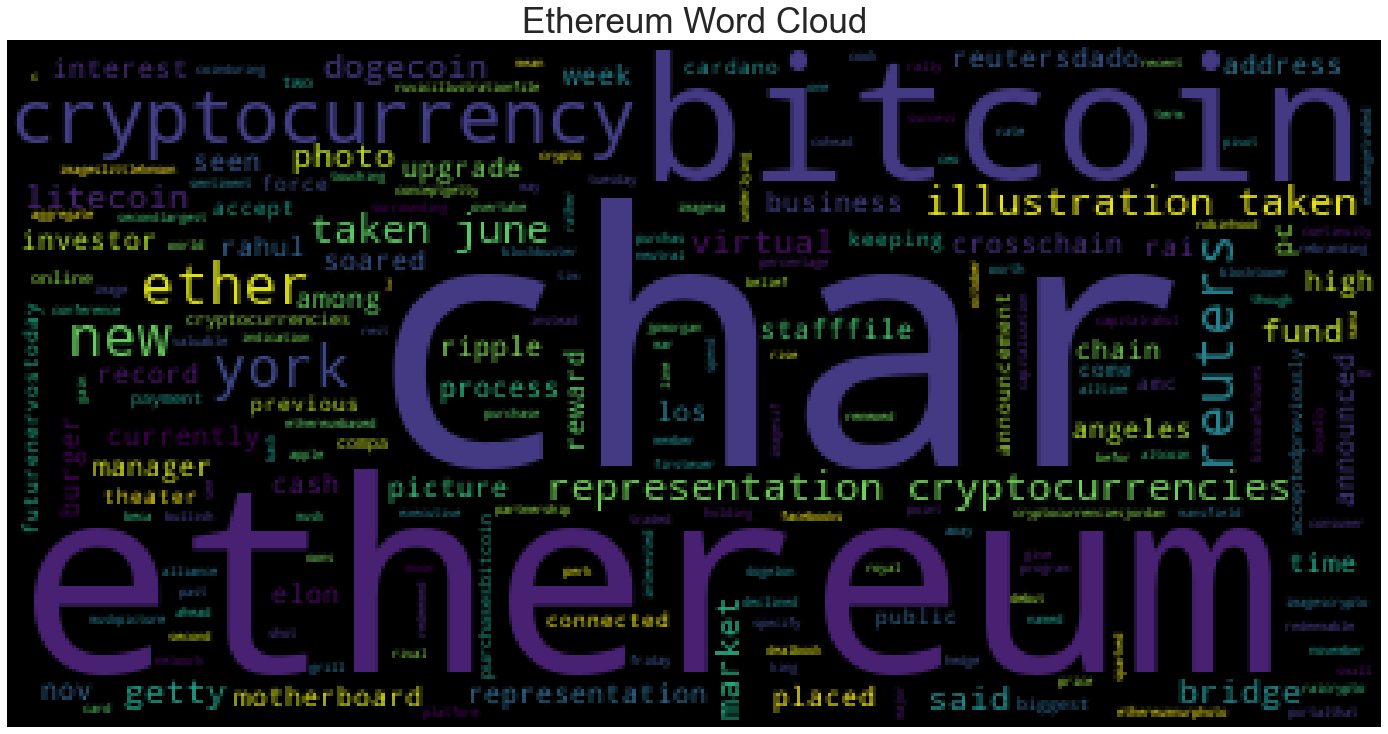

In [24]:
# Generate the Ethereum word cloud
ethereum_string = ' '.join(ethereum_words)
ethereum_wordcloud = wc.generate(ethereum_string)
plt.imshow(ethereum_wordcloud);
plt.axis("off");
plt.title(label="Ethereum Word Cloud", size=35)
plt.tight_layout(pad=0);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
bitcoin_text = ''.join(btc_analysis_df['text'])
bitcoin_text

'A similar hoax earlier this year tied Walmart to Litecoin\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nPhoto Illustration by Thiago Prudencio/S… [+1900 chars]Theres a big new presence slurping up power from the U.S. grid, and its growing: bitcoin miners. New research shows that the U.S. has overtaken China as the top global destination for bitcoin mining … [+3088 chars]For all the talk of democratizing finance, the vast majority of Bitcoin continues to be owned by a relative handful of investors.\r\nAs flagged by Bloomberg, newly released data by the National Bureau … [+4274 chars]In keeping with a previous announcement, AMC theaters now accept cryptocurrencies as payment for online purchases.\xa0\r\nBitcoin, Ethereum, Bitcoin Cash and Litecoin are accepted.\xa0\r\nPreviously, the compa… [+1036 chars]Representation of cryptocurrency Bitcoin is placed on PC motherboard in this illustration taken, June 29, 2021. REUTERS/Dado Ru

In [29]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(bitcoin_text)

# Add a title to the document
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [30]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [31]:
# List all Entities
print(bitcoin_ner.user_data["title"])
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

Bitcoin NER
earlier this year DATE
Verge ORG
Vox Media ORG
Thiago Prudencio/S PERSON
U.S. GPE
U.S. GPE
China GPE
Bitcoin ORG
Bloomberg ORG
the National Bureau ORG
AMC ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationHONG KONG ORG
Oct 21 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuLONDON PERSON
Oct 20 DATE
Reuters ORG
October 19, 2021 DATE
REUTERS ORG
Edgar SuHONG KONG PERSON
Oct 20 DATE
Reuters ORG
Wednesday DATE
first ORDINAL
U.S. GPE
Conway G. Gittens PERSON
October 18, 2021 DATE
REUTERS ORG
Edgar SuSINGAPORE PERSON
Oct 19 DATE
Reuters ORG
six-month DATE
Reuters ORG
Reuters ORG
six-month DATE
Tuesday DATE
U.S. GPE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares PERSON
2021 DATE
Marco Bello PERSON
The Securities and Exchange Commission ORG
Valkyrie PERSON
ETF ORG
NurPhoto ORG
ETF ORG
>Bloomberg PERSON
first ORDINAL
ETF ORG
Rafael Henrique PERSON
Getty Images
 ORG
7% PERCENT
Monday DATE
morning TIME
around $66,105 MONEY
3% PERCENT
4,722 MONEY


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---